<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [51]:
import piplite
await piplite.install(['pandas', 'seaborn'])
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [52]:
from js import fetch
import io
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Fetch the file using JS fetch API
resp = await fetch(URL)
data = await resp.arrayBuffer()

# Convert to BytesIO for pandas
Boston_url = io.BytesIO(data.to_py())

# Read CSV using pandas
Boston_df = pd.read_csv(Boston_url)
Boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


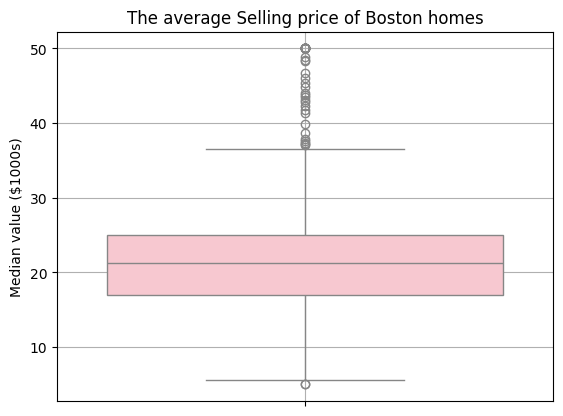

In [53]:
## Create the boxplot 
sns.boxplot(y='MEDV', data=Boston_df, color='pink')
plt.title('The average Selling price of Boston homes')
plt.ylabel('Median value ($1000s)')
plt.grid(True)
plt.show()

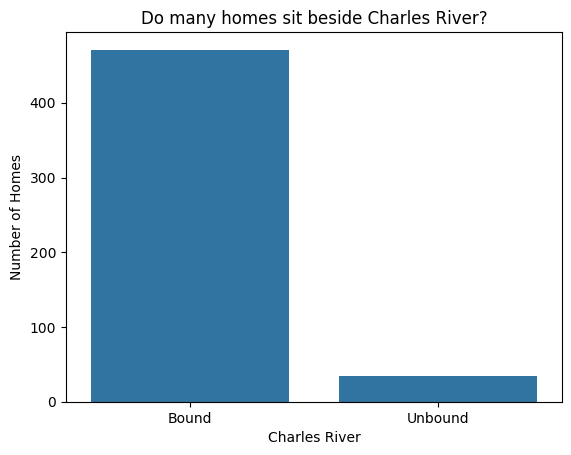

In [54]:
## Bar plot for charler river
Boston_df['CHAS_label']=Boston_df['CHAS'].map({0:'Bound', 1:'Unbound'})

sns.countplot(x='CHAS_label', data=Boston_df)
plt.title('Do many homes sit beside Charles River?')
plt.xlabel('Charles River')
plt.ylabel('Number of Homes')
plt.show()

In [55]:
## Is there a significant difference in median value of houses bound by the Charles river or not? 
### Hypothesis: 
#H0 (Null): There is no difference in the median house values between homes near the Charles River and those further away.
#H1 (Alternative): There is a difference in the median house values depending on whether a home is near the Charles River.

## Test
from scipy.stats import ttest_ind

group1= Boston_df.loc[Boston_df['CHAS']==1, 'MEDV']
group2= Boston_df.loc[Boston_df['CHAS']==0, 'MEDV']
t_stat, p_value= ttest_ind(group1, group2)
print(f't_stat:{t_stat:.2f}')
print(f'p_value:{p_value:.5f}')

if p_value <= 0.05:
   print('Conclusion: We reject the null hypothesis since a significant difference exists in the average selling price (median value) of houses that are near the Charles river and those that are not.')
else:
    print('Conclusion: We fail to reject the null hypothesis since no significant difference exists in the average selling price (median value) of houses that are near the Charles river and those that are not.')
    


t_stat:4.00
p_value:0.00007
Conclusion: We reject the null hypothesis since a significant difference exists in the average selling price (median value) of houses that are near the Charles river and those that are not.


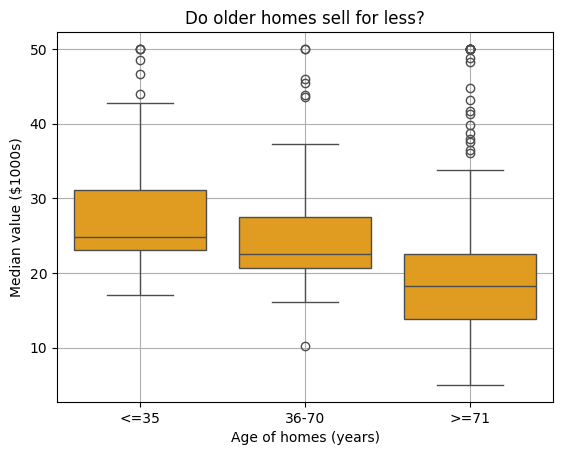

In [67]:
## Boxplot of MEDV vs AGE groups
Boston_df['Age_Group']= pd.cut(Boston_df['AGE'], bins=[0,35,70,100], labels=['<=35', '36-70', '>=71'])

sns.boxplot(x='Age_Group', y='MEDV', data=Boston_df, color='orange')
plt.title('Do older homes sell for less?')
plt.xlabel('Age of homes (years)')
plt.ylabel('Median value ($1000s)')
plt.grid(True)
plt.show()

In [68]:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
### Hypothesis: 
#-H0 (Null): There is no difference in median house values across the 3 age groups.
#-H1 (Alternative): At least one group differs significantly.

from scipy.stats import f_oneway

group1= Boston_df[Boston_df['Age_Group']== '<=35'] ['MEDV']
group2= Boston_df[Boston_df['Age_Group']== '36-70'] ['MEDV']
group3= Boston_df[Boston_df['Age_Group']== '>=71'] ['MEDV']
f_stat, p_value= f_oneway(group1, group2, group3)
print(f'f_stat:{f_stat:.2f}')
print(f'p_value:{p_value:.4f}')

if p_value <= 0.05:
    print('Conclusion: We reject the null hypothesis as the average price of homes significantly differs for at least one of the age groups.')
else:
    print('Conclusion: We fail to reject the null hypothesis as there is no difference in average price of homes across the 3 age groups.')


f_stat:36.41
p_value:0.0000
Conclusion: We reject the null hypothesis as the average price of homes significantly differs for at least one of the age groups.


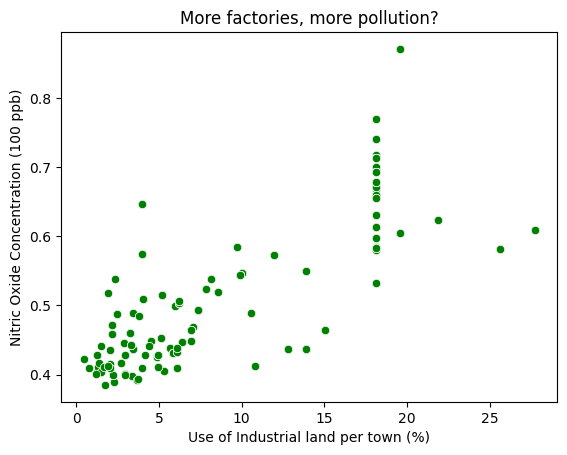

In [75]:
## Scatterplot showing the relationship between Nitric Oxide and Industrial land
sns.scatterplot(x='INDUS', y='NOX', data=Boston_df, color='green')
plt.title('More factories, more pollution?')
plt.xlabel('Use of Industrial land per town (%)')
plt.ylabel('Nitric Oxide Concentration (100 ppb)')
plt.show()

In [70]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

from scipy.stats import pearsonr

corr, p_value= pearsonr(Boston_df['NOX'], Boston_df['INDUS'])
print(f'Pearson Correlation Coefficient: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value <= 0.05:
   print(f'Conclusion: We reject the null hypothesis since a significant correlation exists between Nitric oxide concentrations and proportion of non-retail businesses')
else:
    print('Conclusion: We fail to reject the null hypothesis since no Significant correlation exists between Nitric oxide concentrations and proportion of non-retail businesses')


Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
Conclusion: We reject the null hypothesis since a significant correlation exists between Nitric oxide concentrations and proportion of non-retail businesses


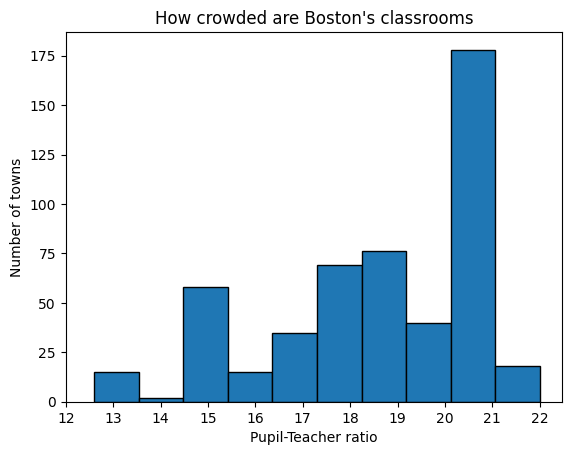

In [71]:
##### Create a histogram showing the distribution of pupil-teacher ratios
plt.hist(x='PTRATIO', bins=10, data=Boston_df, edgecolor='black')
plt.title("How crowded are Boston's classrooms")
plt.xlabel('Pupil-Teacher ratio')
plt.ylabel('Number of towns')
min_value=int(Boston_df['PTRATIO'].min())
max_value=int(Boston_df['PTRATIO'].max())
plt.xticks(np.arange(min_value, max_value+1,1))
plt.show()

In [73]:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

import statsmodels.api as sm

x=Boston_df['DIS']
y=Boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit(cov_type='HC3')
print(model.summary())

if p_value <= 0.05:
   print('Conclusion: We reject the null hypothesis since the Distance significantly impacts the Average price of owner-occupied homes in $1000s')
else:
    print('Conclusion: We fail to reject the null hypothesis since the Distance does not impact the Average price of owner-occupied homes in $1000s')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.25
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.39e-09
Time:                        17:39:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.897     20.493      0.0